In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df1.index.freq = 'MS'

df2 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'D'

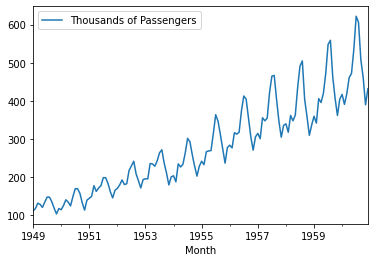

In [2]:
df1.plot()

In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
adfuller(df1['Thousands of Passengers'])

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [6]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index=['ADF Tst Statistics', 'p-value', 'no. of lags used', 'no.of observations'])

In [7]:
for key, val in dftest[4].items():
    dfout[f'critical values ({key})'] = val

dfout

ADF Tst Statistics         0.815369
p-value                    0.991880
no. of lags used          13.000000
no.of observations       130.000000
critical values (1%)      -3.481682
critical values (5%)      -2.884042
critical values (10%)     -2.578770
dtype: float64

In [8]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')

    labels = ['ADF Test Statistics', 'p-value', 'no. og lags used', 'no. of observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical values ({key})'] = val

    print(out.to_string())

    if result[1] <= 0.05:
        print('Strong evidence against the null hypopthesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

In [9]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller test: 
ADF Test Statistics        0.815369
p-value                    0.991880
no. og lags used          13.000000
no. of observations      130.000000
critical values (1%)      -3.481682
critical values (5%)      -2.884042
critical values (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [10]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


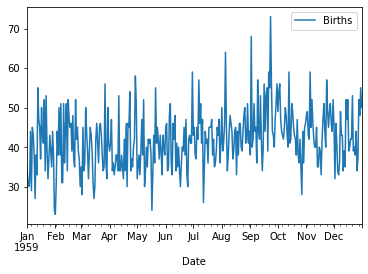

In [11]:
df2.plot()

In [12]:
adf_test(df2['Births'])

Augmented Dickey-Fuller test: 
ADF Test Statistics       -4.808291
p-value                    0.000052
no. og lags used           6.000000
no. of observations      358.000000
critical values (1%)      -3.448749
critical values (5%)      -2.869647
critical values (10%)     -2.571089
Strong evidence against the null hypopthesis
Reject the null hypothesis
Data has no unit root and is stationary


In [14]:
df3 = pd.read_csv('samples.csv', index_col=0, parse_dates=True)
df3.index.freq = 'MS'

In [15]:
df3.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


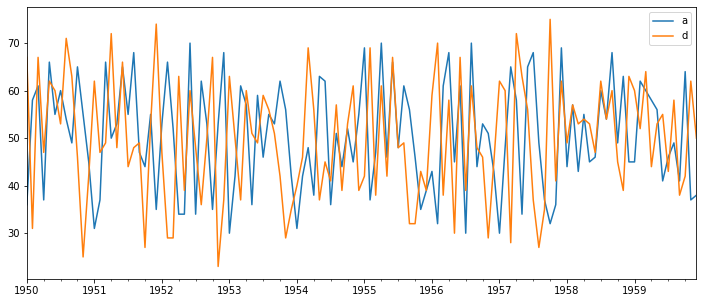

In [17]:
df3[['a', 'd']].plot(figsize=(12, 5))

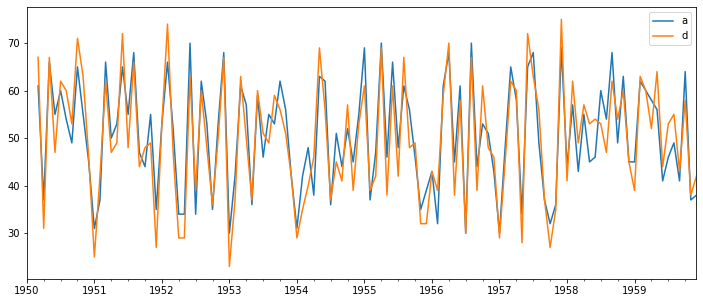

In [18]:
df3['a'].iloc[2:].plot(figsize=(12, 5), legend=True)
df3['d'].shift(2).plot(legend=True)

In [19]:
from statsmodels.tsa.stattools import grangercausalitytests

In [21]:
grangercausalitytests(df3[['a', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [22]:
grangercausalitytests(df3[['b', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


In [23]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(20, 30, (50, 2)), columns=['test', 'predictions'])

In [24]:
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


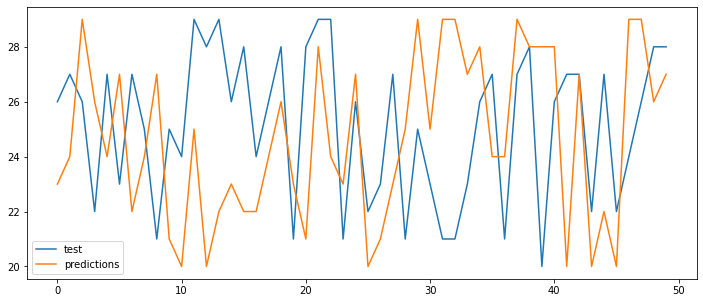

In [26]:
df.plot(figsize=(12,5))

In [27]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [28]:
mse(df['test'], df['predictions'])

17.02

In [29]:
rmse(df['test'], df['predictions'])

4.125530268947253

In [30]:
meanabs(df['test'], df['predictions'])

3.54

In [31]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [32]:
df.index.freq = 'MS'

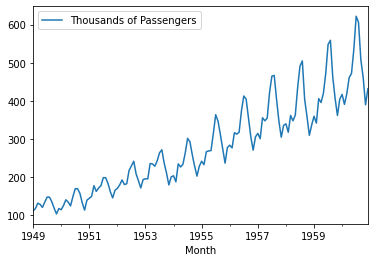

In [33]:
df.plot()

In [34]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

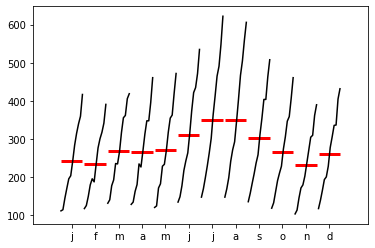

In [36]:
month_plot(df['Thousands of Passengers']);

In [38]:
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()

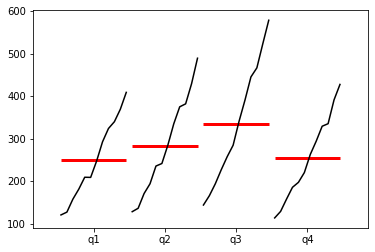

In [39]:
quarter_plot(dfq);